### **1. Imports**:
1.1 Import needed libaries and parquet file 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import missingno as msno
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#df = pd.read_parquet('/content/drive/MyDrive/finaldf.parquet')
df = pd.read_parquet('/content/drive/MyDrive/df.parquet')

EDA Steps
1. Find missing values
2. All the numerical variables
3. Distribution of the Numerical variables
4. Categorical Variables
5. Caribaility of categorical variables

6. Outliers
7. Realtionship between independent and dependent feature

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df.head()

,channelGrouping,date,deviceCategory,operatingSystem,fullVisitorId,country,bounces,hits,newVisits,pageviews,timeOnSite,totalTransactionRevenue,transactions,visits,adContent,isTrueDirect,medium,referralPath,source,visitId,visitNumber,visitStartTime,isClick,isImpression,localProductPrice,localProductRevenue,productBrand,productListName,productListPosition,productPrice,productQuantity,productRevenue,productSKU,exitScreenName,landingScreenName,contentGroupUniqueViews1,contentGroupUniqueViews2,contentGroupUniqueViews3,action_type,eventAction,eventCategory,eventLabel,isFatal,domContentLoadedTime,domInteractiveTime,domainLookupTime,redirectionTime,serverResponseTime,promoIsClick,promoIsView,hasSocialSourceReferral,socialNetwork
0,Paid Search,20161213,desktop,Windows,2354762258917424053,United States,None,6,1,5,64,None,None,1,None,None,none,None,direct,1481694159,1,1481694159,None,None,None,None,None,None,None,None,None,None,None,shop.googlemerchandisestore/asearch.html/quick...,googlemerchandisestore/home,None,None,None,0,None,None,None,True,None,None,None,None,None,None,None,No,notset
1,Organic Search,20161213,desktop,Linux,7697777980964141864,United States,None,7,1,6,95,None,None,1,None,None,none,None,direct,1481697362,1,1481697362,None,None,None,None,None,None,None,None,None,None,None,shop.googlemerchandisestore/google+redesign/of...,googlemerchandisestore/home,None,None,None,0,None,None,None,True,None,None,None,None,None,None,None,No,notset
2,Organic Search,20161213,tablet,iOS,5257258229472069086,Canada,None,17,1,13,301,None,None,1,None,None,none,None,direct,1481681754,1,1481681754,None,None,None,None,None,None,None,None,None,None,None,shop.googlemerchandisestore/google+redesign/ap...,googlemerchandisestore/home,None,None,None,0,None,None,None,True,None,None,None,None,None,None,None,No,notset
3,Referral,20161213,desktop,Macintosh,4099844335483212481,United States,None,53,None,49,3887,None,None,1,None,None,referral,/google-merchandise-store,dealspotr.com,1481659119,2,1481659119,None,None,None,None,None,None,None,None,None,None,None,shop.googlemerchandisestore/myaccount.html?mod...,googlemerchandisestore/home,None,None,None,0,None,None,None,True,None,None,None,None,None,None,None,No,notset
4,Organic Search,20161213,desktop,Windows,1942229998114450957,United States,None,59,1,41,463,None,None,1,None,None,none,None,direct,1481694001,1,1481694001,None,None,None,None,None,None,None,None,None,None,None,shop.googlemerchandisestore/google+redesign/sh...,googlemerchandisestore/home,None,None,None,0,None,None,None,True,None,None,None,None,None,None,None,No,notset


In [5]:
df.shape

(903653, 52)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 52 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   channelGrouping           903653 non-null  object
 1   date                      903653 non-null  object
 2   deviceCategory            903653 non-null  object
 3   operatingSystem           903653 non-null  object
 4   fullVisitorId             903653 non-null  object
 5   country                   903653 non-null  object
 6   bounces                   450630 non-null  object
 7   hits                      903653 non-null  object
 8   newVisits                 703060 non-null  object
 9   pageviews                 903553 non-null  object
 10  timeOnSite                451894 non-null  object
 11  totalTransactionRevenue   11515 non-null   object
 12  transactions              11552 non-null   object
 13  visits                    903653 non-null  object
 14  adCo

### **1. Data type conversion


In [7]:
temp = df.copy()

In [8]:
temp.date = pd.to_datetime(df['date'])

In [83]:
numlist = ['bounces', 'hits', 'newVisits', 'pageviews','timeOnSite', 'totalTransactionRevenue', 'transactions', 'visits','visitId', 'visitNumber', 'visitStartTime', 'isClick', 'isImpression',
       'localProductPrice', 'localProductRevenue','productPrice',
       'productQuantity', 'productRevenue', 'action_type',
       'domContentLoadedTime', 'domInteractiveTime', 'domainLookupTime',
       'redirectionTime', 'serverResponseTime']

for i in numlist:
  temp[i] = pd.to_numeric(df[i])


In [86]:
temp1['fullVisitorId'] = pd.to_numeric(df['fullVisitorId'],errors='ignore')

In [10]:
print(dict(temp.dtypes))

{'channelGrouping': dtype('O'), 'date': dtype('<M8[ns]'), 'deviceCategory': dtype('O'), 'operatingSystem': dtype('O'), 'fullVisitorId': dtype('O'), 'country': dtype('O'), 'bounces': dtype('float64'), 'hits': dtype('int64'), 'newVisits': dtype('float64'), 'pageviews': dtype('float64'), 'timeOnSite': dtype('float64'), 'totalTransactionRevenue': dtype('float64'), 'transactions': dtype('float64'), 'visits': dtype('int64'), 'adContent': dtype('O'), 'isTrueDirect': dtype('O'), 'medium': dtype('O'), 'referralPath': dtype('O'), 'source': dtype('O'), 'visitId': dtype('int64'), 'visitNumber': dtype('int64'), 'visitStartTime': dtype('int64'), 'isClick': dtype('float64'), 'isImpression': dtype('float64'), 'localProductPrice': dtype('float64'), 'localProductRevenue': dtype('float64'), 'productBrand': dtype('O'), 'productListName': dtype('O'), 'productListPosition': dtype('O'), 'productPrice': dtype('float64'), 'productQuantity': dtype('float64'), 'productRevenue': dtype('float64'), 'productSKU': dt

In [11]:
Cat_var = []
Num_var = []
for k,v in dict(temp.dtypes).items():
  if v == 'O':
    Cat_var.append(k)

  else:
    Num_var.append(k)

print(Cat_var)
print(Num_var)


['channelGrouping', 'deviceCategory', 'operatingSystem', 'fullVisitorId', 'country', 'adContent', 'isTrueDirect', 'medium', 'referralPath', 'source', 'productBrand', 'productListName', 'productListPosition', 'productSKU', 'exitScreenName', 'landingScreenName', 'contentGroupUniqueViews1', 'contentGroupUniqueViews2', 'contentGroupUniqueViews3', 'eventAction', 'eventCategory', 'eventLabel', 'promoIsClick', 'promoIsView', 'hasSocialSourceReferral', 'socialNetwork']
['date', 'bounces', 'hits', 'newVisits', 'pageviews', 'timeOnSite', 'totalTransactionRevenue', 'transactions', 'visits', 'visitId', 'visitNumber', 'visitStartTime', 'isClick', 'isImpression', 'localProductPrice', 'localProductRevenue', 'productPrice', 'productQuantity', 'productRevenue', 'action_type', 'isFatal', 'domContentLoadedTime', 'domInteractiveTime', 'domainLookupTime', 'redirectionTime', 'serverResponseTime']


## 2. Missing Values 

*   investigate fillna values
*   drop outliers



In [12]:
features_na = [features for features in df.columns if df[features].isnull().sum() > 1]

for features in features_na:
  print(features,':', np.round(df[features].isnull().mean(),4),'% missing values')

bounces : 0.5013 % missing values
newVisits : 0.222 % missing values
pageviews : 0.0001 % missing values
timeOnSite : 0.4999 % missing values
totalTransactionRevenue : 0.9873 % missing values
transactions : 0.9872 % missing values
adContent : 0.9879 % missing values
isTrueDirect : 0.6968 % missing values
referralPath : 0.6338 % missing values
isClick : 0.9985 % missing values
isImpression : 0.7405 % missing values
localProductPrice : 0.737 % missing values
localProductRevenue : 1.0 % missing values
productBrand : 0.737 % missing values
productListName : 0.737 % missing values
productListPosition : 0.737 % missing values
productPrice : 0.737 % missing values
productQuantity : 0.9994 % missing values
productRevenue : 1.0 % missing values
productSKU : 0.737 % missing values
contentGroupUniqueViews1 : 0.9972 % missing values
contentGroupUniqueViews2 : 0.7375 % missing values
contentGroupUniqueViews3 : 0.9634 % missing values
eventAction : 0.9972 % missing values
eventCategory : 0.9972 % mi

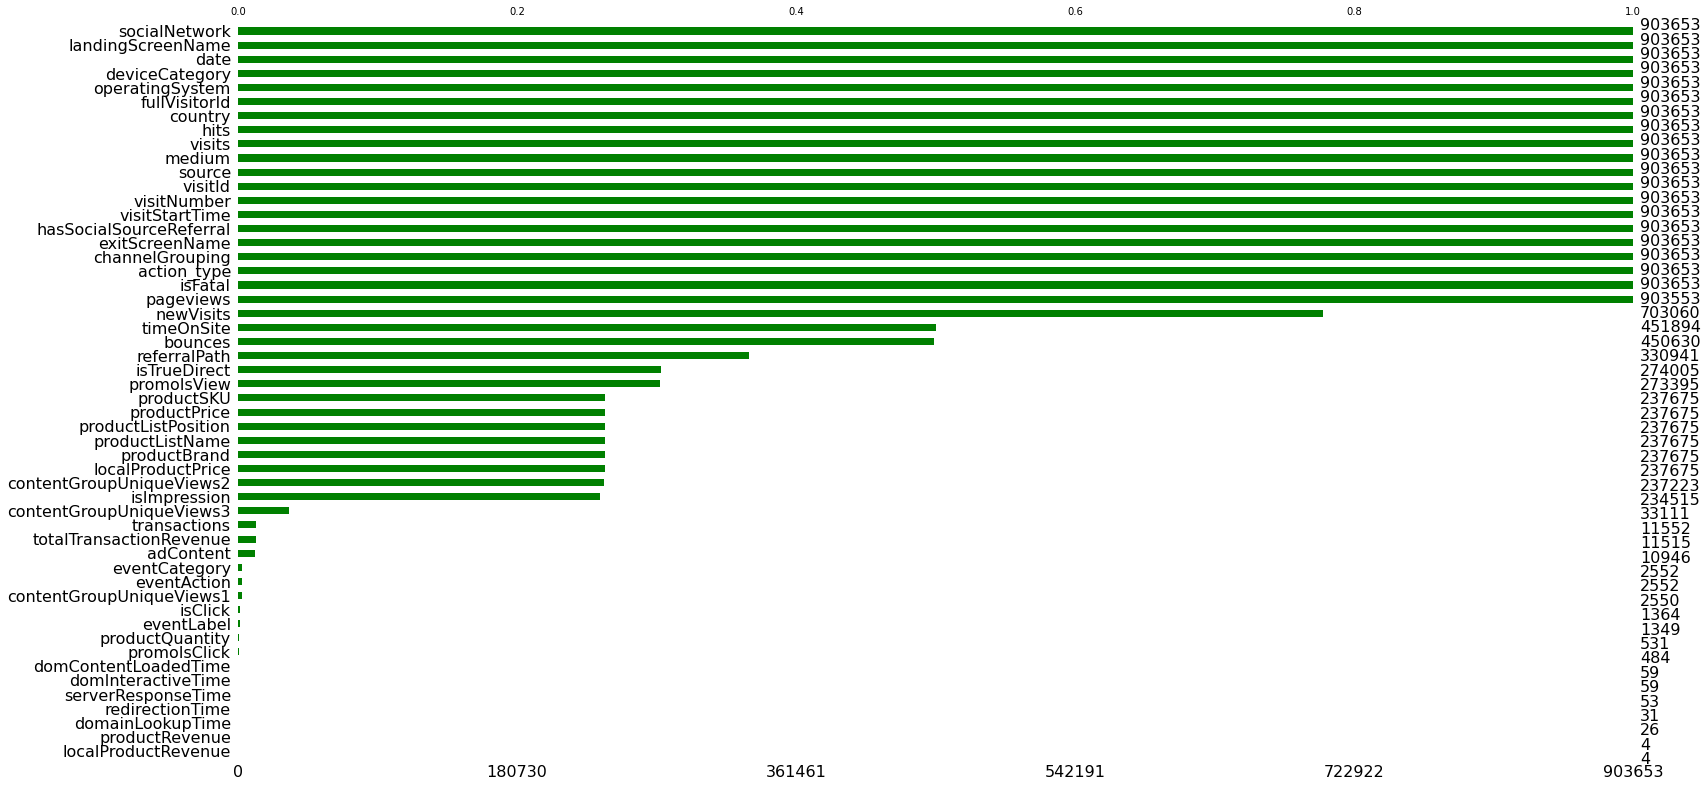

In [13]:
msno.bar(df,color='green',sort='ascending')

In [52]:
nafiller = ['bounces','isClick','timeOnSite','transactions','totalTransactionRevenue','domContentLoadedTime','serverResponseTime','redirectionTime','domainLookupTime','domInteractiveTime','newVisits','visits','isImpression','productQuantity','productRevenue']
for i in nafiller:
  #print(i,':',temp[i].unique())
  temp[i] = temp[i].fillna(0).astype(float)

In [15]:
temp.bounces.value_counts()

0.0    453023
1.0    450630
Name: bounces, dtype: int64

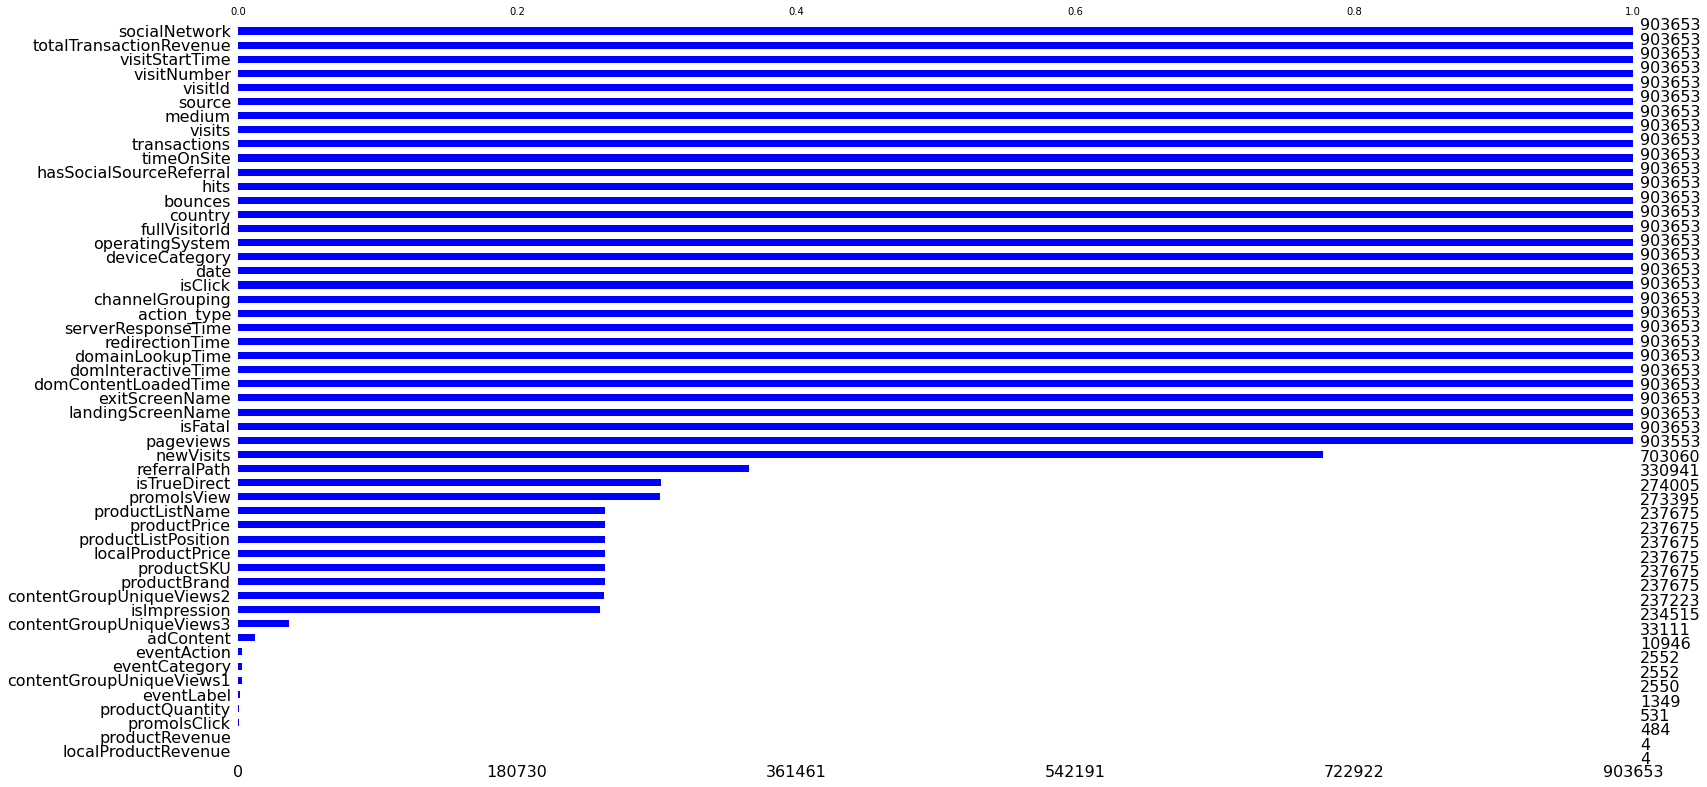

In [16]:
msno.bar(temp,color='blue',sort='ascending')

## 3.Categorical Variables exploration & Insights

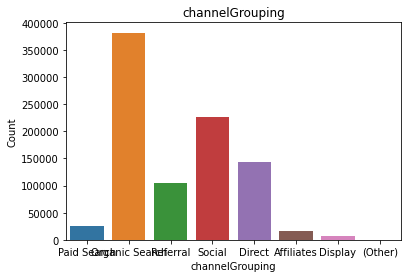

In [17]:
##Channel Grouping
_ = sns.countplot(x=temp['channelGrouping'])
_.set_ylabel('Count')
_.set_title('channelGrouping')
sns.set(rc = {'figure.figsize':(30,10)})

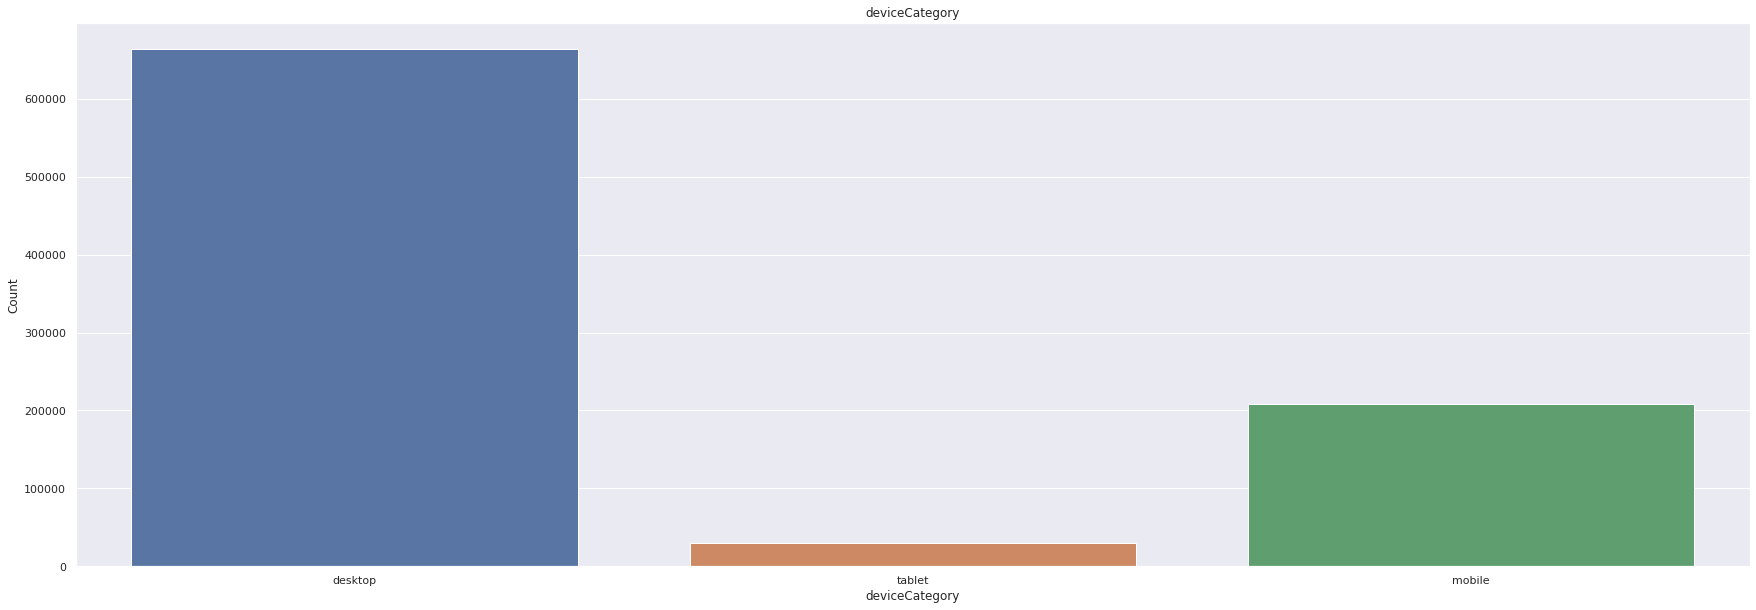

In [18]:
#Device Category
_ = sns.countplot(x=temp['deviceCategory'])
_.set_ylabel('Count')
_.set_title('deviceCategory')
sns.set(rc = {'figure.figsize':(30,10)})

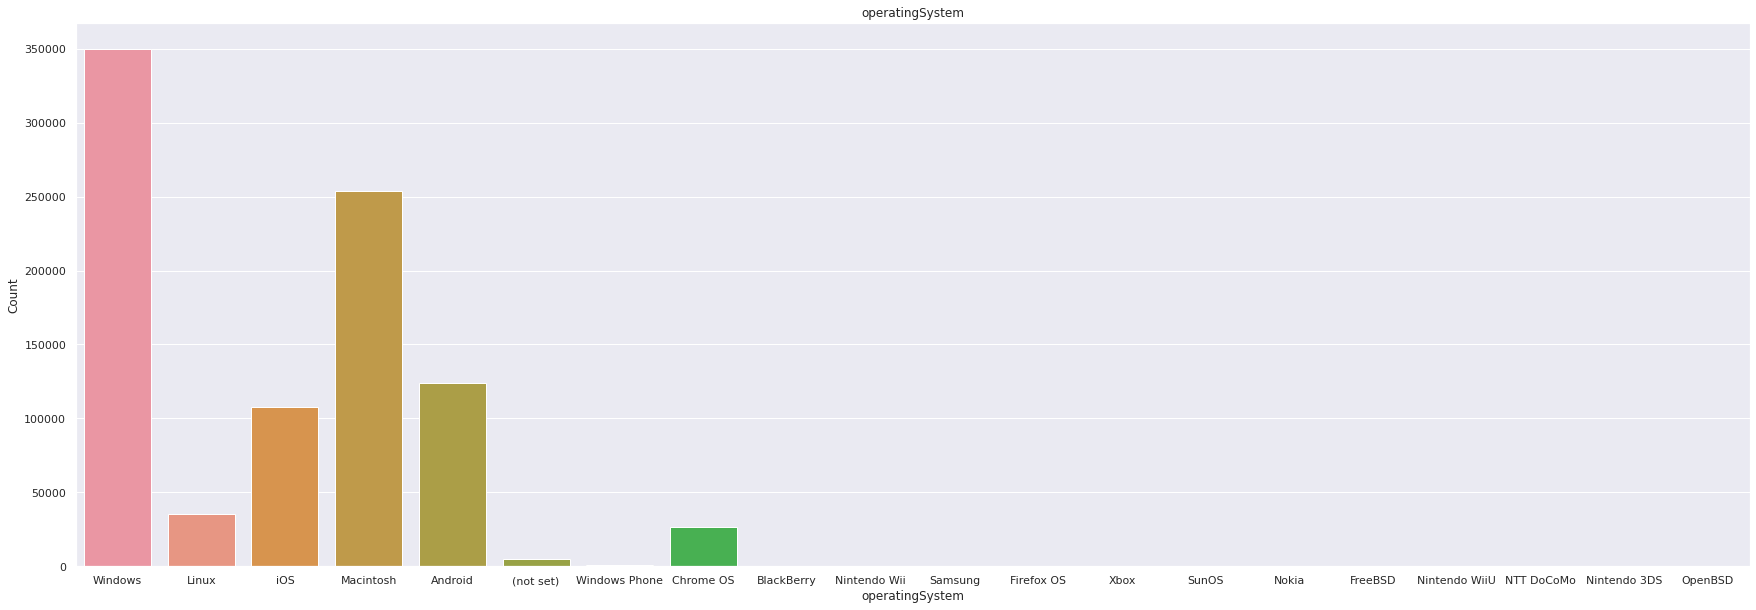

In [19]:
#Operating System
_ = sns.countplot(x=temp['operatingSystem'])
_.set_ylabel('Count')
_.set_title('operatingSystem')
sns.set(rc = {'figure.figsize':(30,10)})

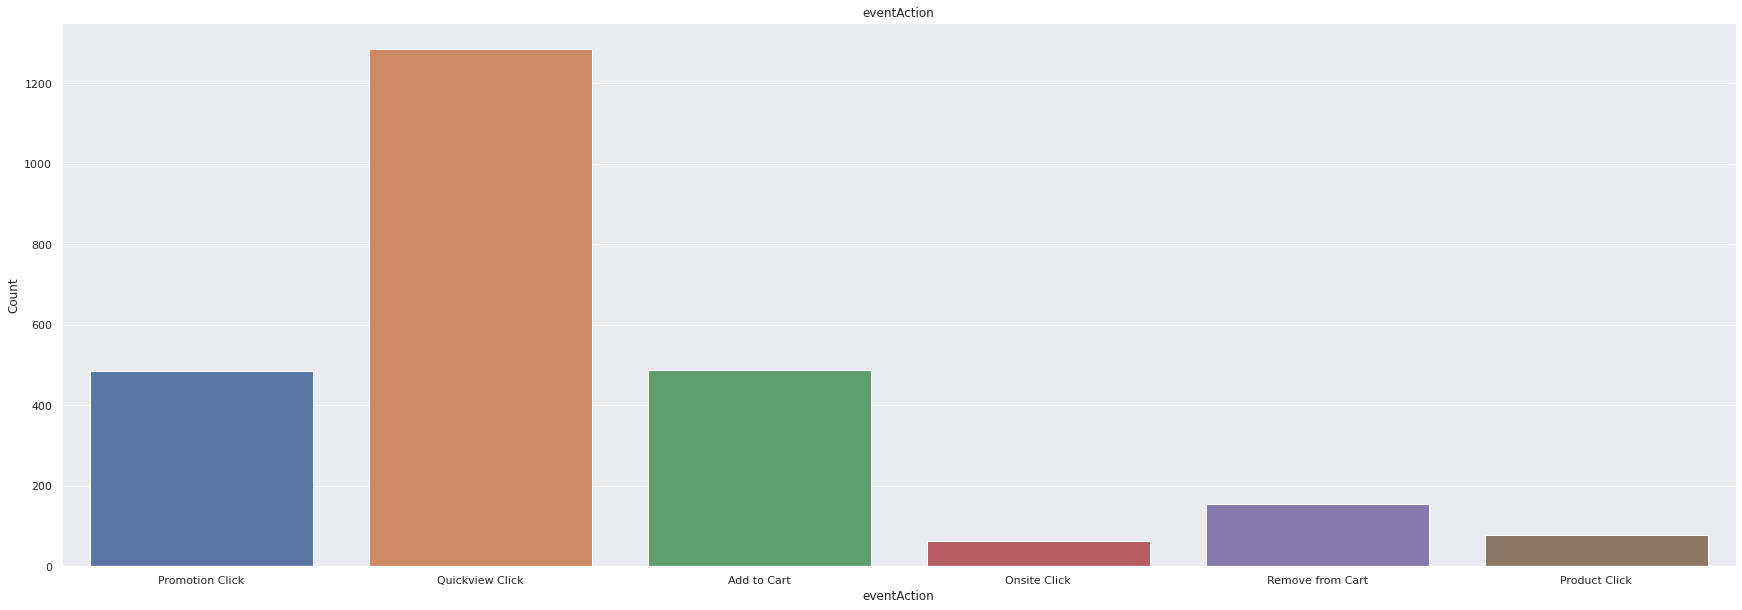

In [20]:
#EventAction: Customer behavior during product interaction
_ = sns.countplot(x=temp['eventAction'])
_.set_ylabel('Count')
_.set_title('eventAction')
sns.set(rc = {'figure.figsize':(30,10)})

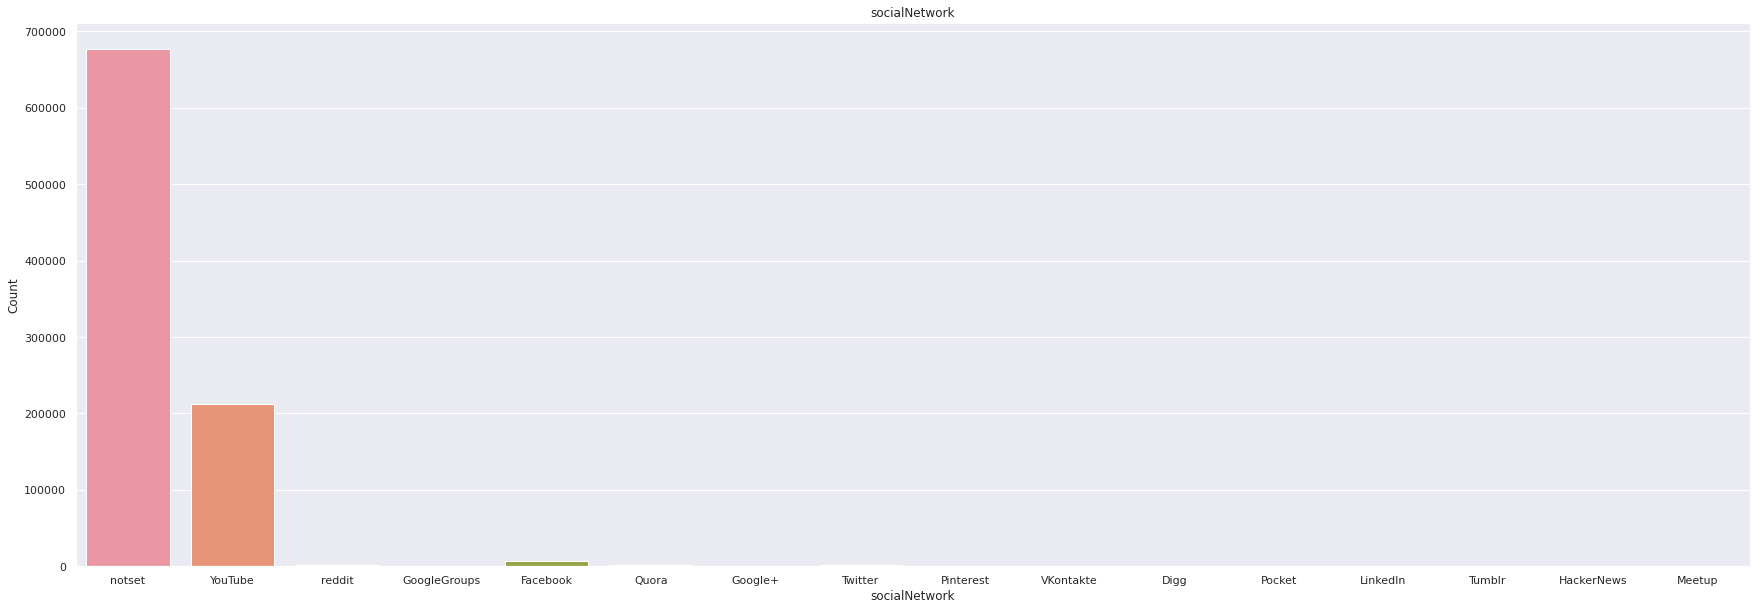

In [21]:
#SocialNetwok
_ = sns.countplot(x=temp['socialNetwork'])
_.set_ylabel('Count')
_.set_title('socialNetwork')
sns.set(rc = {'figure.figsize':(30,10)})

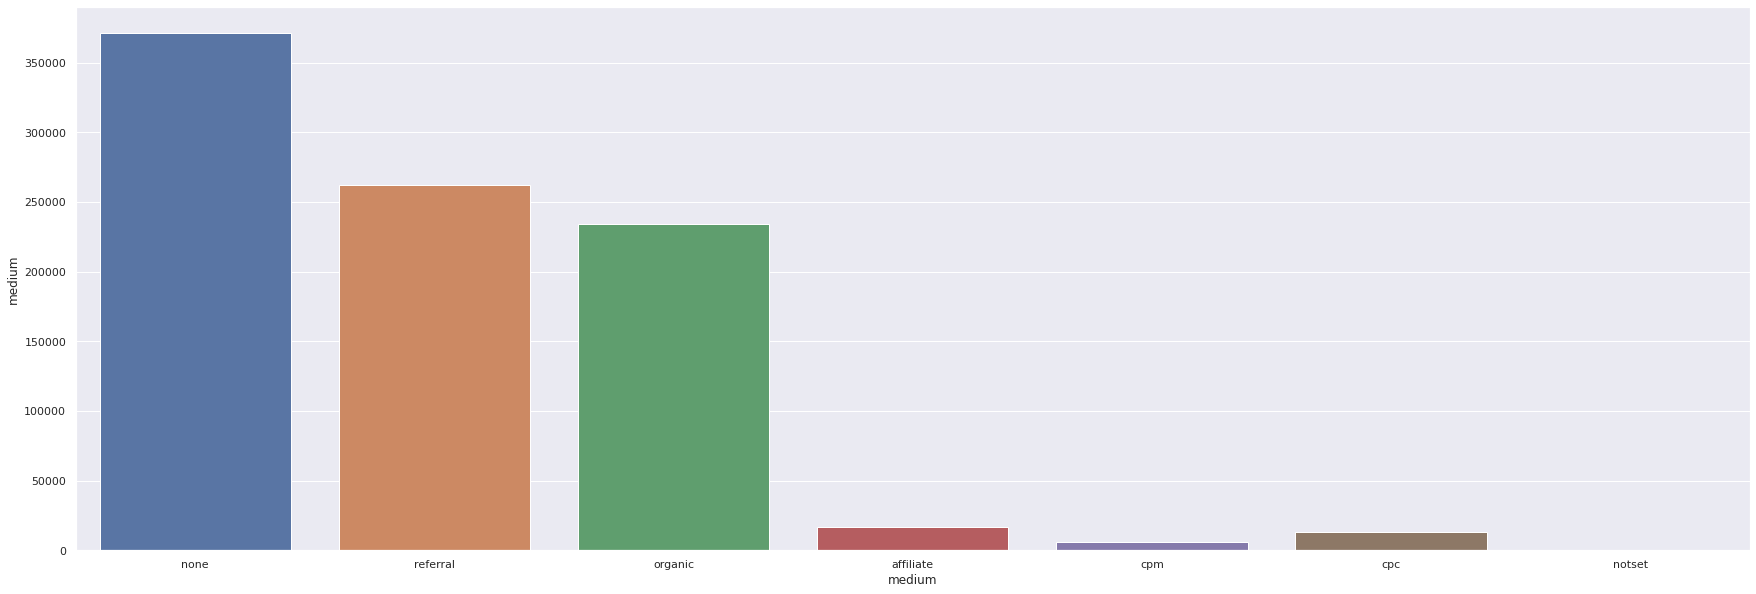

In [22]:
#Medium
_ = sns.countplot(x=temp['medium'])
_.set_ylabel('medium')
sns.set(rc = {'figure.figsize':(30,10)})

**Insight: Categorical Variables**

*   Most usuage are Organic seaches,Desktop,Windows,Quickview on cart with median amount added to cart.
*   Can drop following columns as they don't provide major insights on customer based or are missing majority of data: countr,adContent,isTrueDirect,medium,referralPAth,product info, Screename,CGUV,eventcategory & label, promo and socil info.


## 4. Numerical Variables Exploration & Insights

In [55]:
temp1=temp.drop(columns=Cat_var)

In [30]:
temp1.columns

Index(['date', 'bounces', 'hits', 'newVisits', 'pageviews', 'timeOnSite',
       'totalTransactionRevenue', 'transactions', 'visits', 'visitId',
       'visitNumber', 'visitStartTime', 'isClick', 'isImpression',
       'localProductPrice', 'localProductRevenue', 'productPrice',
       'productQuantity', 'productRevenue', 'action_type', 'isFatal',
       'domContentLoadedTime', 'domInteractiveTime', 'domainLookupTime',
       'redirectionTime', 'serverResponseTime'],
      dtype='object')

In [56]:
temp1 = temp1.drop(columns=['isFatal'])

In [ ]:
Num_var

In [ ]:
temp1.dtypes

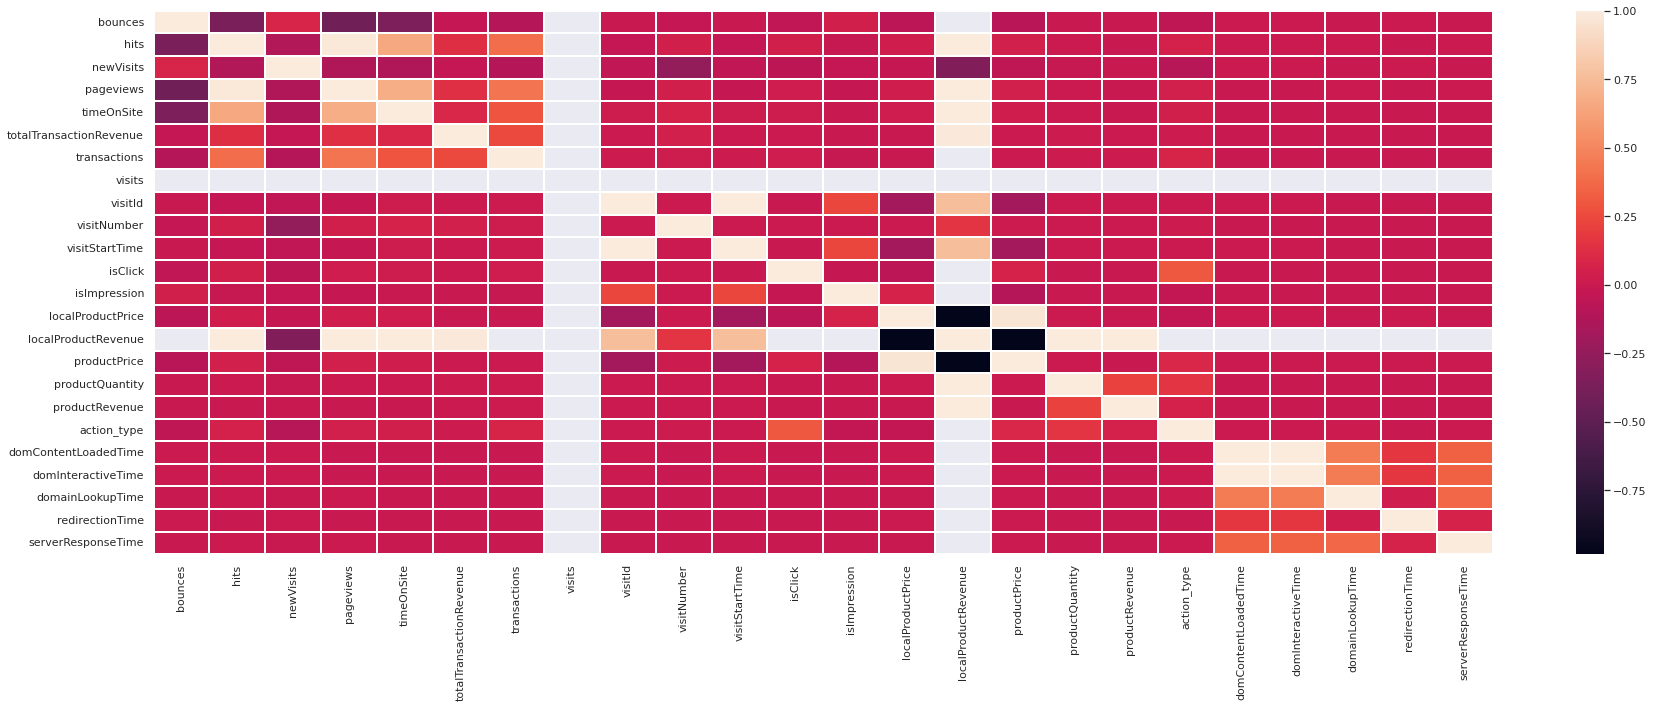

In [61]:
_=sns.heatmap(temp1.corr(),linewidths=1)

Numerical Features Insight:

*   Correlation between each numerical variables not very helpful as most data needs to be wrangled and create more integrated features
*   Timeonsite vs pageviews has decent correlation showing customer behaivor
*   Same goes for pageviews vs hits & transactions vs hits 


In [87]:
def scatterplots(columns, ncol=None, figsize=(60,60)):
        if ncol is None:
            ncol = len(columns)
        nrow = int(np.ceil(len(columns) / ncol))
        fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
        fig.subplots_adjust(wspace=0.5, hspace=0.6)
        for i, col in enumerate(columns):
            ax = axes.flatten()[i]
            ax.scatter(x = 'fullVisitorId', y = col, data=temp1, alpha=0.5)
            ax.set(xlabel='Customers', ylabel=col)
        nsubplots = nrow * ncol    
        for empty in range(i+1, nsubplots):
            axes.flatten()[empty].set_visible(False)
  

In [71]:
temp1.columns

Index(['date', 'bounces', 'hits', 'newVisits', 'pageviews', 'timeOnSite',
       'totalTransactionRevenue', 'transactions', 'visits', 'visitId',
       'visitNumber', 'visitStartTime', 'isClick', 'isImpression',
       'localProductPrice', 'localProductRevenue', 'productPrice',
       'productQuantity', 'productRevenue', 'action_type',
       'domContentLoadedTime', 'domInteractiveTime', 'domainLookupTime',
       'redirectionTime', 'serverResponseTime'],
      dtype='object')

In [ ]:
scatterplots(temp1.columns,ncol=4)

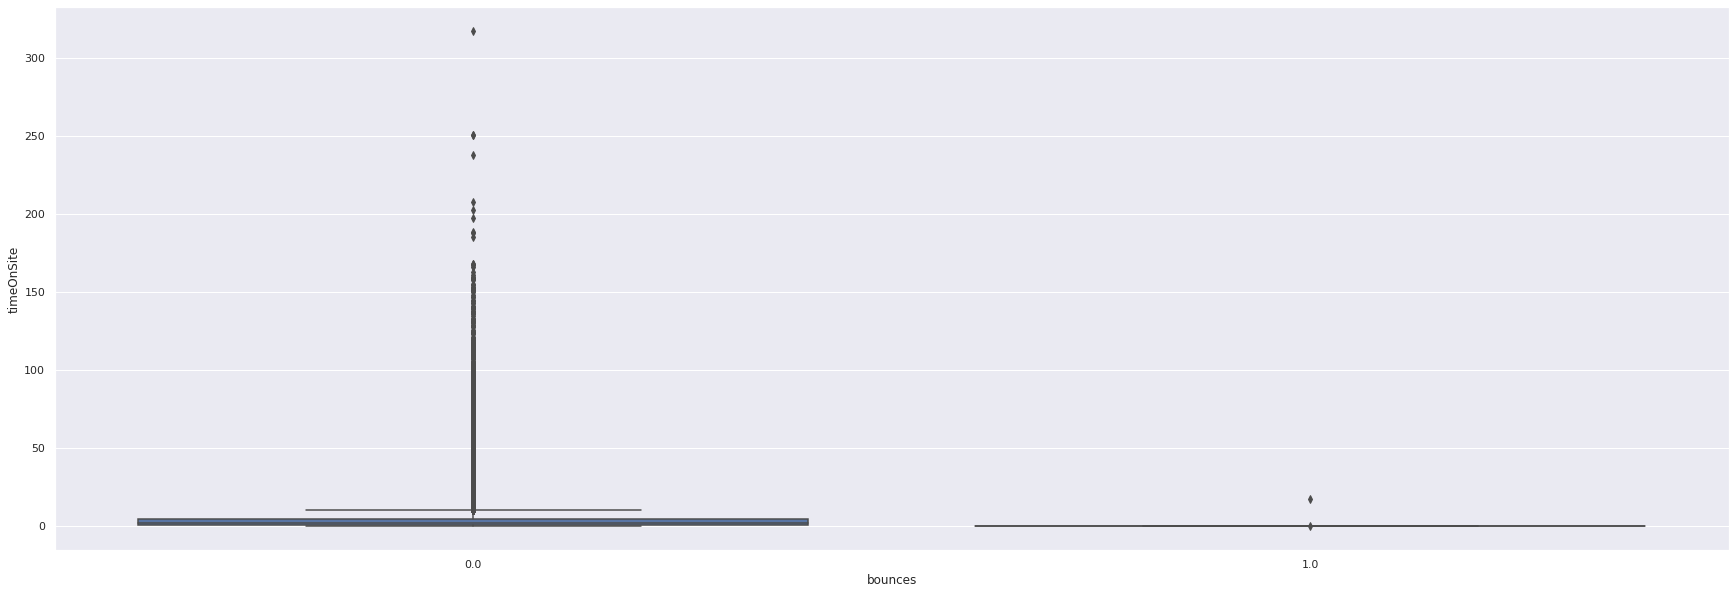

In [24]:
_=sns.boxplot(x=temp['bounces'],y=temp['timeOnSite']/60)

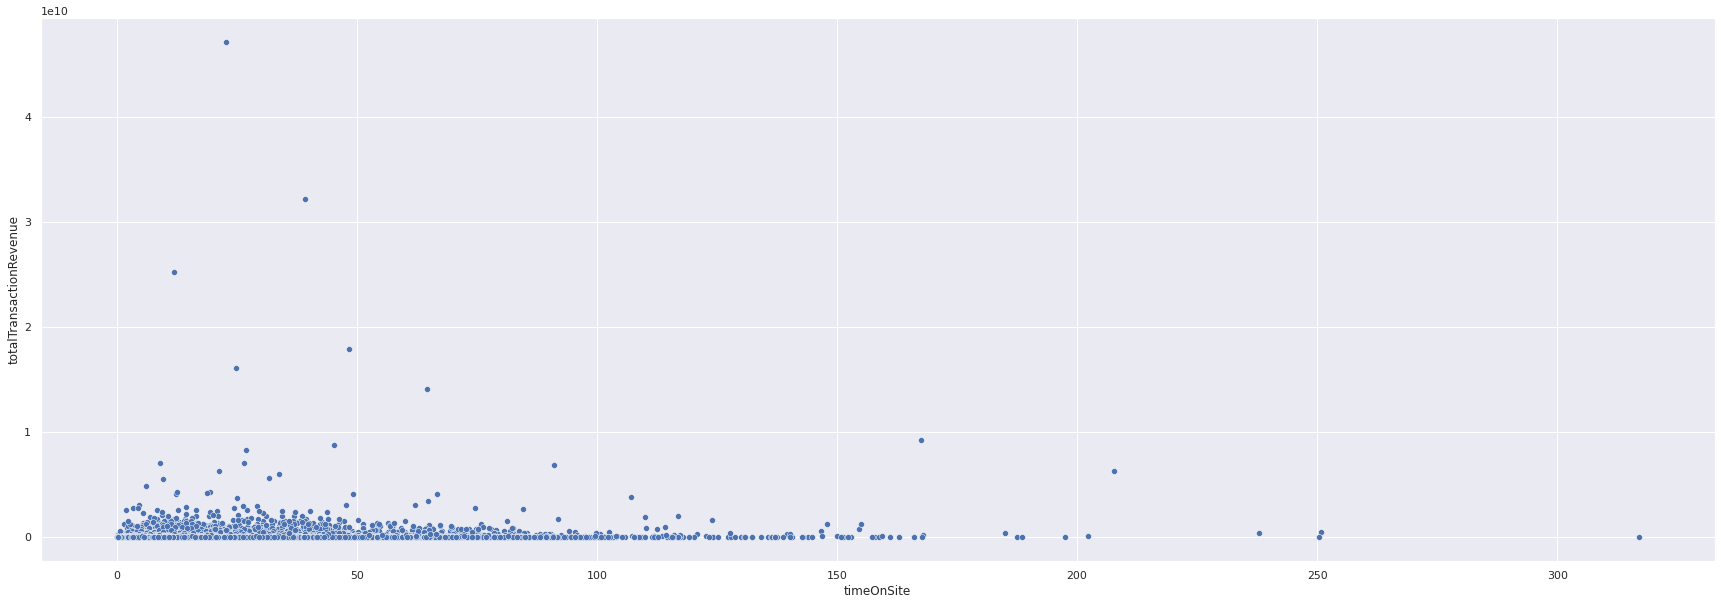

In [42]:
_=sns.scatterplot(x=temp['timeOnSite']/60,y=temp['totalTransactionRevenue'])

## Key insights:

*   Create new aggregated features from explored categorical variables such as ChannelGrouping or eventAction for example. These will help indicate customer behavior in churn model as they show most promise. Dummy encoding will be required

*   With Numerical Variables there were lot of Na values within each num columns need to be replace with aggregated feature that show either sum,mean, or max  


